# Tutorial: Path Histogram

This gives a little overview of the option and behavior of the `PathHistogram` object. The `PathHistogram` is used for path density plots and free energy plots. It extends the basic `SparseHistogram` code by allowing for interpolation between bins, and by allowing one to normalize on a per-trajectory basis.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import openpathsampling as paths
from openpathsampling.analysis import PathHistogram
from openpathsampling.analysis.path_histogram import (
    BresenhamInterpolation, BresenhamLikeInterpolation, SubdivideInterpolation
)
from openpathsampling.numerics import HistogramPlotter2D

In [2]:
trajectory = [(0.1, 0.3), (2.1, 3.1), (1.7, 1.4), (1.6, 0.6), (0.1, 1.4), (2.2, 3.3)]
x, y = zip(*trajectory)

Here's our trajectory. The grid happens to correspond with the bins I'll use for the histograms.

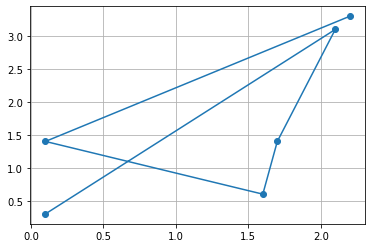

In [3]:
plt.grid(True)
plt.plot(x, y, 'o-')

The first type of histogram is what you'd get from just histogramming the frames.

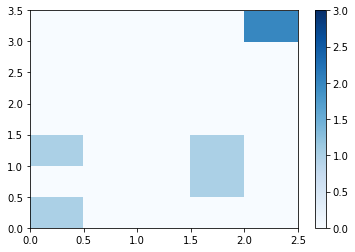

In [4]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5),
                     interpolate=False, per_traj=False)

hist.add_trajectory(trajectory)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5),
                              cmap="Blues", vmin=0, vmax=3)

The next type of histogram uses that fact that we know this is a trajectory, so we do linear interpolation between the frames. This gives us a count of every time the trajectory enters a given bin. We can use this kind of histogram for free energy plots based on the reweighted path ensemble.

We have several possible interpolation algorithms, so let's show one image for each of them. `SubdivideInterpolation` is the most exact, but it is also quite slow. The default interpolation is `BresenhamLikeInterpolation`; this will be used if you just give `interpolate=True`.

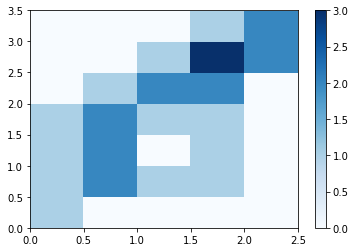

In [5]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5),
                     interpolate=SubdivideInterpolation, per_traj=False)

hist.add_trajectory(trajectory)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5),
                              cmap="Blues", vmin=0, vmax=3)

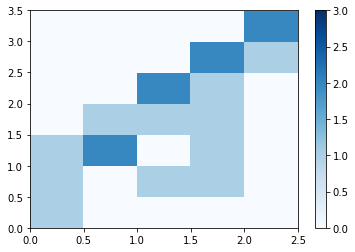

In [6]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5),
                     interpolate=BresenhamLikeInterpolation, per_traj=False)

hist.add_trajectory(trajectory)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5),
                              cmap="Blues", vmin=0, vmax=3)

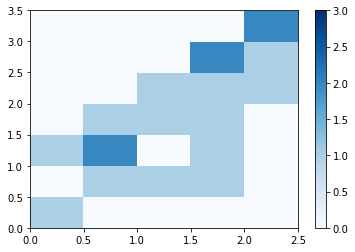

In [7]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5),
                     interpolate=BresenhamInterpolation, per_traj=False)

hist.add_trajectory(trajectory)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5),
                              cmap="Blues", vmin=0, vmax=3)

The next type of histogram uses the interpolation, but also normalizes so that each trajectory only contributes once per bin. This is what we use for a path density plot.

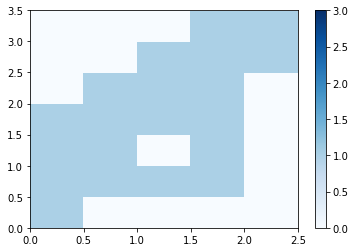

In [8]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5),
                     interpolate=SubdivideInterpolation, per_traj=True)

hist.add_trajectory(trajectory)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5),
                              cmap="Blues", vmin=0, vmax=3)

Of course, we can normalize to one contribution per path while *not* interpolating. I don't think this is actually useful.

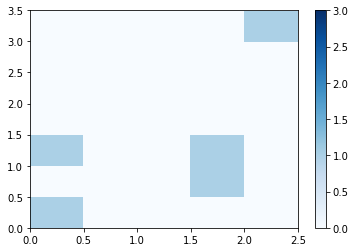

In [9]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5),
                     interpolate=False, per_traj=True)

hist.add_trajectory(trajectory)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5),
                              cmap="Blues", vmin=0, vmax=3)

Hypothetically, it is possible for a path to cut exactly through a corner. It won't happen in the real world, but we would like our interpolation algorithm to get even the unlikely cases right.

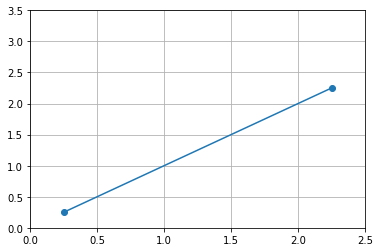

In [10]:
diag = [(0.25, 0.25), (2.25, 2.25)]
diag_x, diag_y = zip(*diag)
plt.grid(True)
ticks = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
plt.xticks(ticks)
plt.yticks(ticks)
plt.xlim(0, 2.5)
plt.ylim(0, 3.5)
plt.plot(diag_x, diag_y, 'o-')

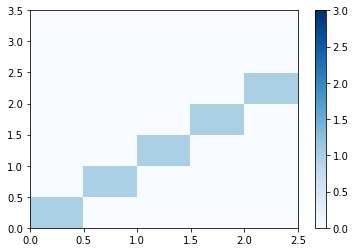

In [11]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5),
                     interpolate=SubdivideInterpolation, per_traj=True)

hist.add_trajectory(diag)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5),
                              cmap="Blues", vmin=0, vmax=3)

How would we make this into an actual path density plot? Add the trajectories on top of each other.

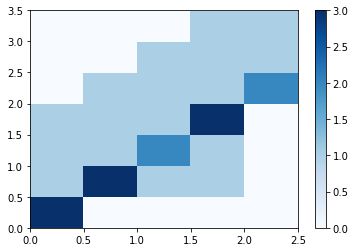

In [12]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5),
                     interpolate=SubdivideInterpolation, per_traj=True)
hist.add_trajectory(diag, weight=2) # each trajectory can be assigned a weight (useful for RPE)
hist.add_trajectory(trajectory)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5),
                              cmap="Blues", vmin=0, vmax=3)

The actual `PathDensity` object also contains information about the collective variables we map this into, and has a convenience function to take a list of regular OPS trajectories and make the whole path histogram out of them.